<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/3_KNN_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

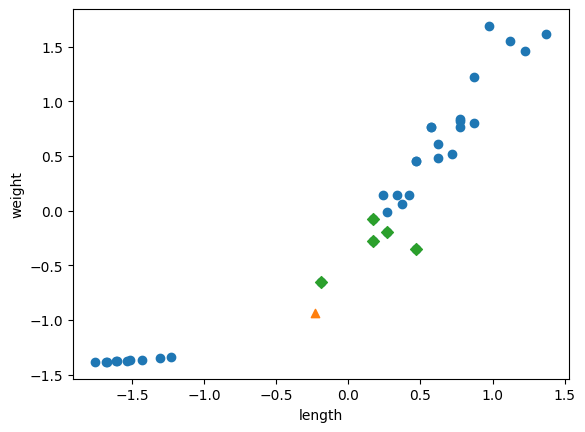

In [11]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))  # 행-열 변환

fish_target = np.concatenate((np.ones(35), np.zeros(14)))  # 배열 연결

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)  # stratify = fish_target 타겟값으로 분리 비율 조정

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

# print(kn.predict([[25, 150]]))  # 이상 데이터

import matplotlib.pyplot as plt
# plt.scatter(train_input[:, 0], train_input[:, 1])
# plt.scatter(25, 150, marker = '^')
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()

distances, indexes = kn.kneighbors([[25, 150]])

# plt.scatter(train_input[:, 0], train_input[:, 1])
# plt.scatter(25, 150, marker = '^')
# plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()

# plt.scatter(train_input[:, 0], train_input[:, 1])
# plt.scatter(25, 150, marker = '^')
# plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
# plt.xlim((0, 1000))
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()


'''
스케일 차이
- 두 특성 간 범위 차이

데이터 전처리
- 알고리즘들은 샘플 간 거리에 영향을 많이 받으므로 특성값을 일정한 기준으로 맞춰야 됨

표준 점수(z점수)
- 특성값이 평균에서 표준편차의 몇배만큼 떨어져 있는지를 나타냄
- 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지 나타내는 값

분산
- 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구함

표준편차
- 분산의 제곱근으로 데이터가 분산된 정도를 나타냄
'''

mean = np.mean(train_input, axis = 0)  #  열 기준
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
new = ([25, 150] - mean) / std

# plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
# plt.scatter(new[0], new[1], marker = '^')
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()

kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()